# **Visualización de datos con Seaborn**

Empezaremos trabajando con Seaborn, una biblioteca que tiene las siguientes características:
- Crea facilmente los tipos más comúnes de gráficos
- Trabaja con las estructuras de `pandas`
- Construido sobre Matplotlib, pero con una mayor facilidad para el trabajo


Primero, instalamos e importamos la biblioteca

In [ ]:
pip install seaborn matplotlib

In [2]:
import seaborn as sns # Samuel Norman Seaborn (sns)
import matplotlib.pyplot as plt # Importamos Matplotlib porque es la biblioteca sobre la cual está construida Seaborn
import pandas as pd

## **Tipos de gráficos**

### Scatter Plot

Un scatter plot es una representación gráfica de puntos en un plano cartesiano, donde cada punto en el gráfico representa un par de valores (x, y). Se utiliza para visualizar la distribución y la relación entre dos variables numéricas.

In [114]:

# * Preprocesamiento de la información
# Lectura
enaho = pd.read_csv("../data/raw/enaho_procesado_18_19.csv")
# Arreglo en variable Sexo
enaho = enaho.rename(columns={'male':'sexo'})
enaho['sexo'] = enaho['sexo'].astype(str)
enaho['sexo'] = enaho['sexo'].replace({'1':'Hombre','0':'Mujer'})
# Arreglo en variable educación
enaho['educacion'] = enaho['educacion'].astype(str)
enaho['educacion'] = enaho['educacion'].replace({'1.0':'Sin educación','2.0':'Educación básica','3.0':'Educación superior','4.0':'Maestría/doctorado'})
# Variables importantes
enaho = enaho[['año','sexo','ingresos_mensuales','edad','educacion']]
enaho['ingresos_mensuales'] = enaho['ingresos_mensuales']/12
# Visualización
enaho.head(5)


,año,sexo,ingresos_mensuales,edad,educacion
0,2018,Mujer,2222.459091,46.0,Educación superior
1,2018,Mujer,4271.303030,42.0,Maestría/doctorado
2,2018,Hombre,2819.501515,59.0,Educación superior
3,2018,Hombre,1879.715152,33.0,Educación superior
4,2018,Mujer,1064.763636,23.0,Educación superior


Vamos a realizar un gráfico de dispersión de los ingresos contra la edad

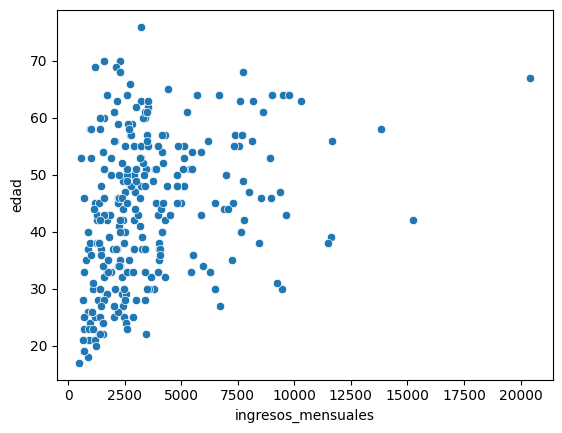

In [115]:

# * Espacio para configurar el gráfico
sns.scatterplot(x='ingresos_mensuales', y='edad', data=enaho)

# * Opción para ver el gráfico
plt.show()

Podemos añadir una tercera variable categórica

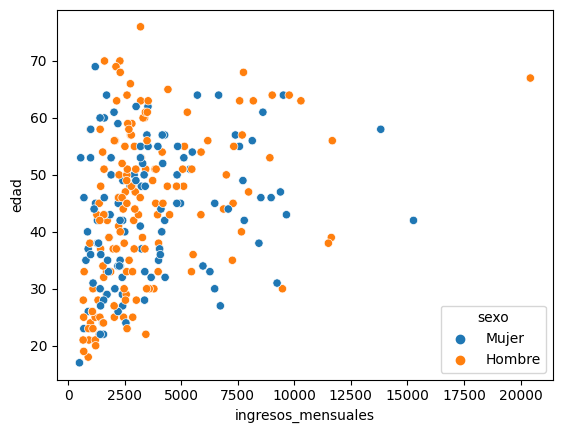

In [116]:

# * Espacio para configurar el gráfico
sns.scatterplot(x='ingresos_mensuales', y='edad', data=enaho, hue='sexo')

# * Opción para ver el gráfico
plt.show()

Y ordenar los valores a nuestro gusto

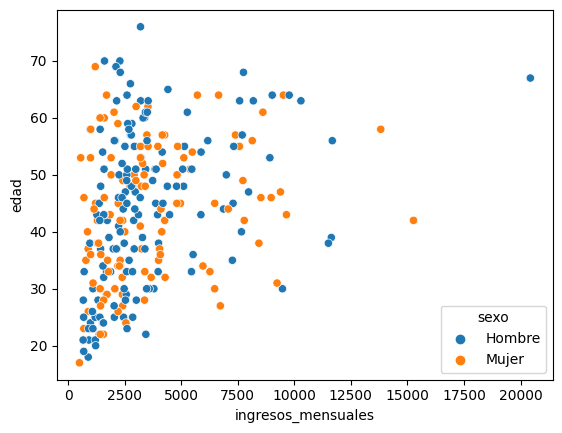

In [117]:

# * Espacio para configurar el gráfico
sns.scatterplot(x='ingresos_mensuales', y='edad', data=enaho, hue='sexo', hue_order=['Hombre','Mujer'])

# * Opción para ver el gráfico
plt.show()

Se pueden modificar los colores

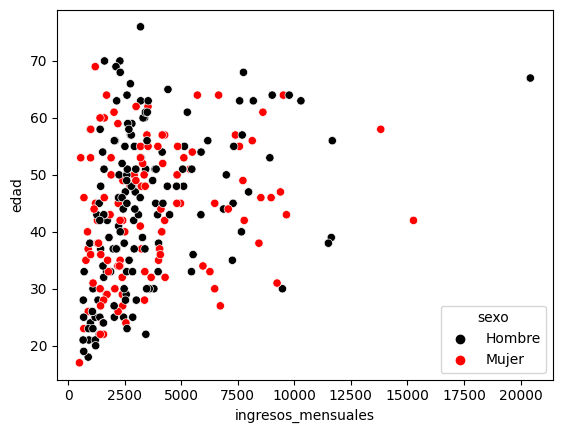

In [118]:

# * Espacio para configurar el gráfico

hue_colors = {"Hombre": "black", "Mujer": "red"}

sns.scatterplot(x='ingresos_mensuales', y='edad', data=enaho, hue='sexo', hue_order=['Hombre','Mujer'], palette=hue_colors)

# * Opción para ver el gráfico
plt.show()

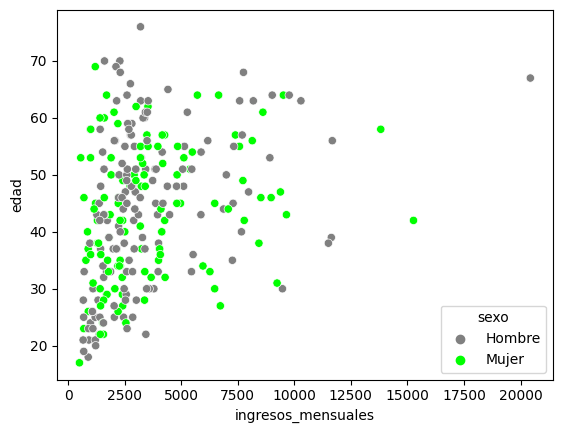

In [119]:

# * Espacio para configurar el gráfico

hue_colors = {"Hombre": "#808080", "Mujer": "#00FF00"}

sns.scatterplot(x='ingresos_mensuales', y='edad', data=enaho, hue='sexo', hue_order=['Hombre','Mujer'], palette=hue_colors)

# * Opción para ver el gráfico
plt.show()

Y separar las distribuciones en dos gráficos

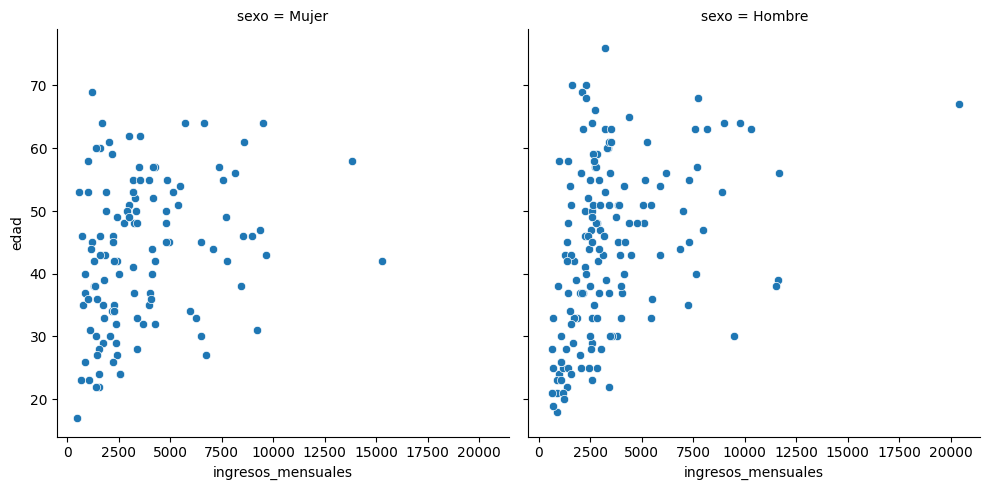

In [120]:

# * Espacio para configurar el gráfico

sns.relplot(x='ingresos_mensuales', y='edad', data=enaho, kind="scatter", col='sexo')

# * Opción para ver el gráfico
plt.show()

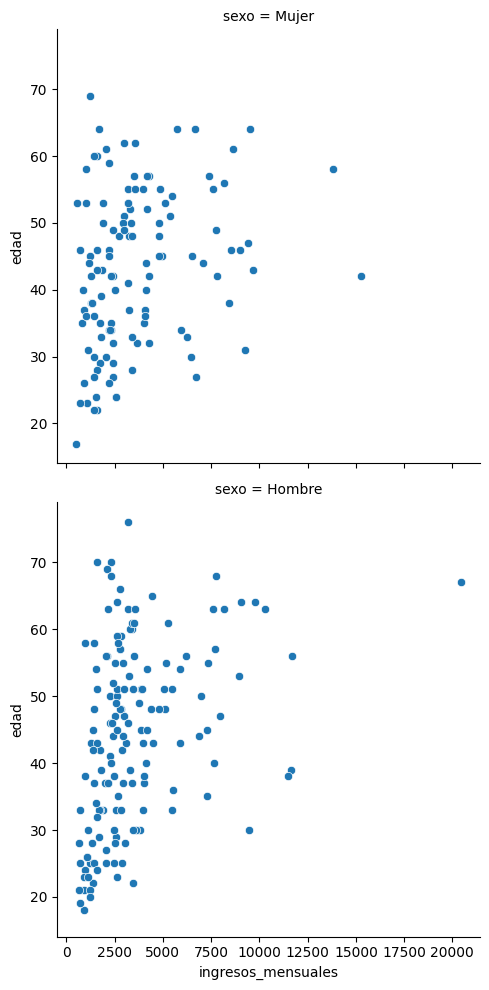

In [121]:

# * Espacio para configurar el gráfico

sns.relplot(x='ingresos_mensuales', y='edad', data=enaho, kind="scatter", row='sexo')

# * Opción para ver el gráfico
plt.show()

Incluso podemos hacer cruces entre dos variables categóricas

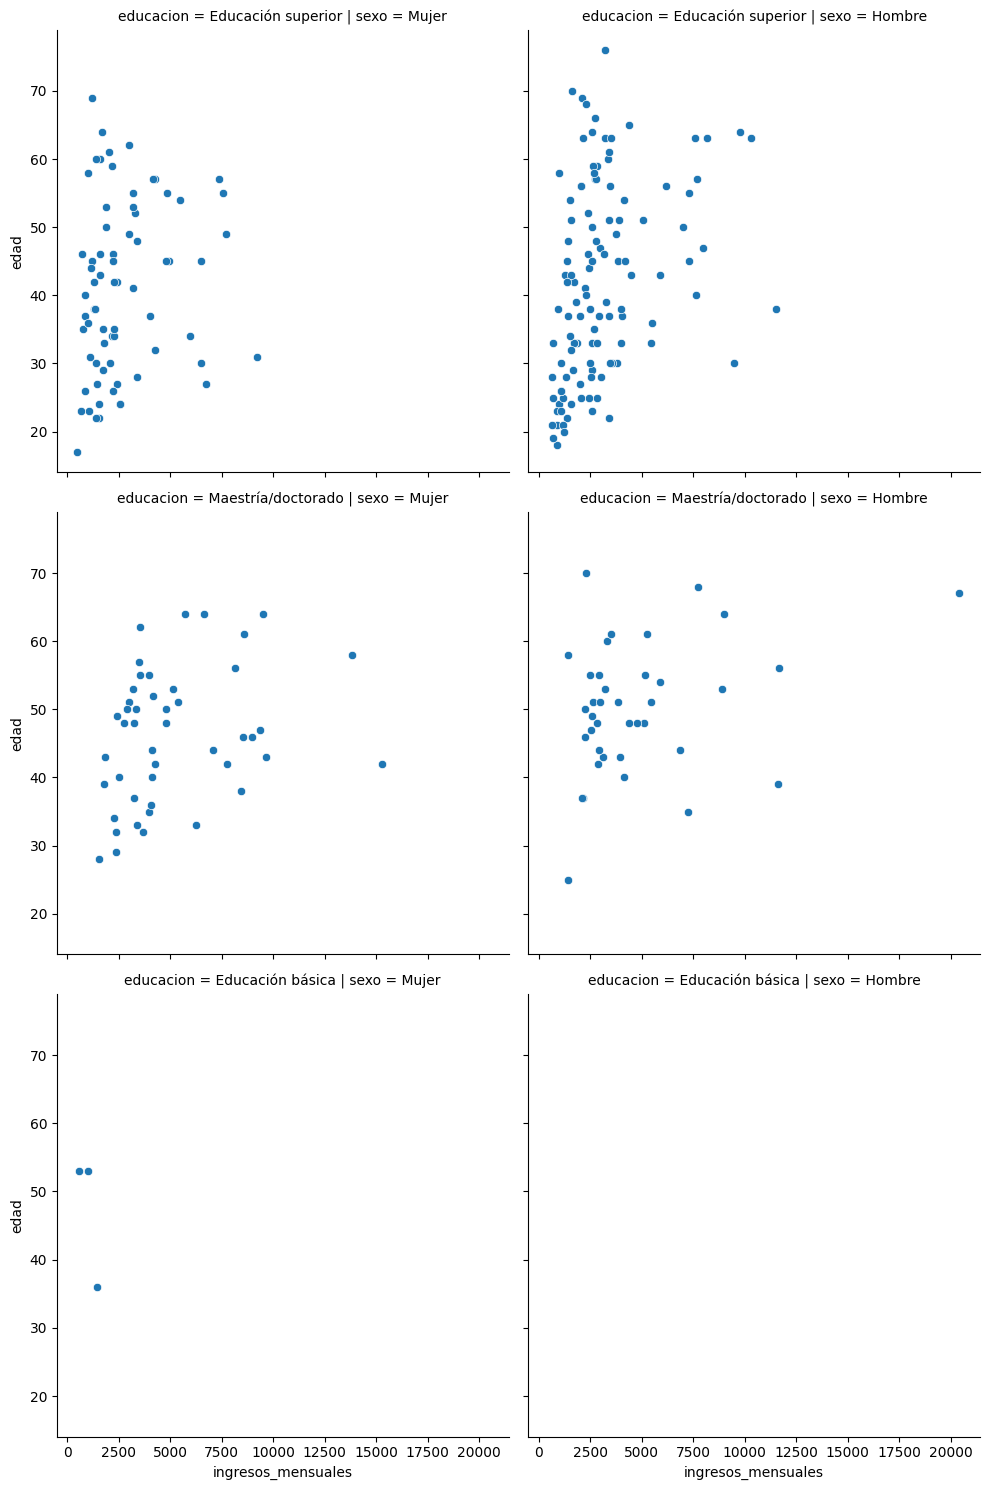

In [122]:

# * Espacio para configurar el gráfico

sns.relplot(x='ingresos_mensuales', y='edad', data=enaho, kind="scatter", col='sexo', row='educacion')

# * Opción para ver el gráfico
plt.show()

Y modificar la visualización: por tamaño

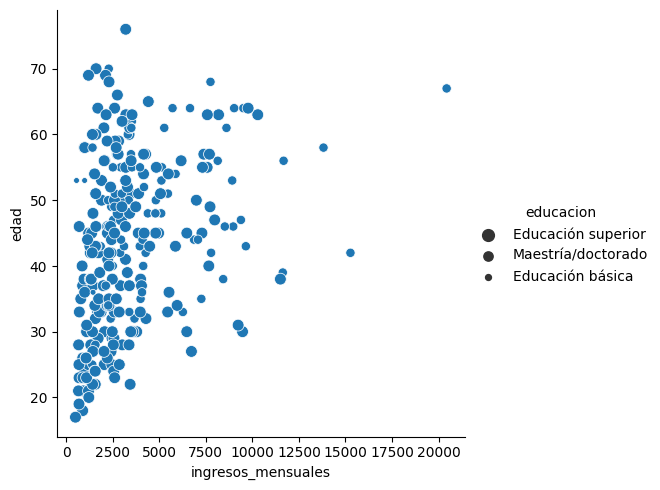

In [123]:

# * Espacio para configurar el gráfico

sns.relplot(x='ingresos_mensuales', y='edad', data=enaho, kind="scatter", size='educacion')

# * Opción para ver el gráfico
plt.show()

Por tamaño y categoría

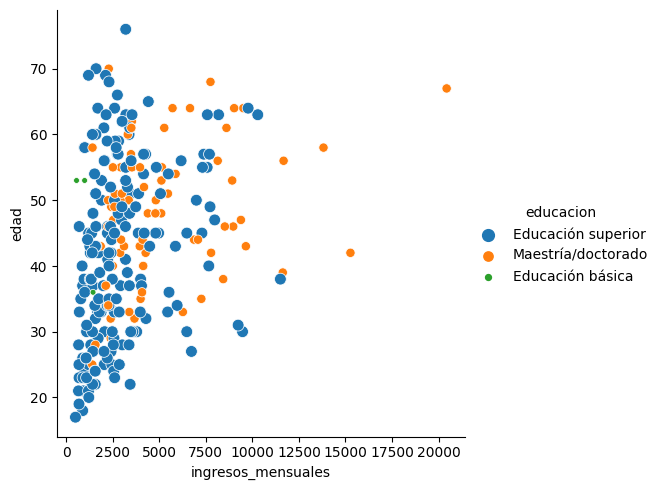

In [124]:

# * Espacio para configurar el gráfico

sns.relplot(x='ingresos_mensuales', y='edad', data=enaho, kind="scatter", size='educacion', hue='educacion')

# * Opción para ver el gráfico
plt.show()

Con diferentes estilos

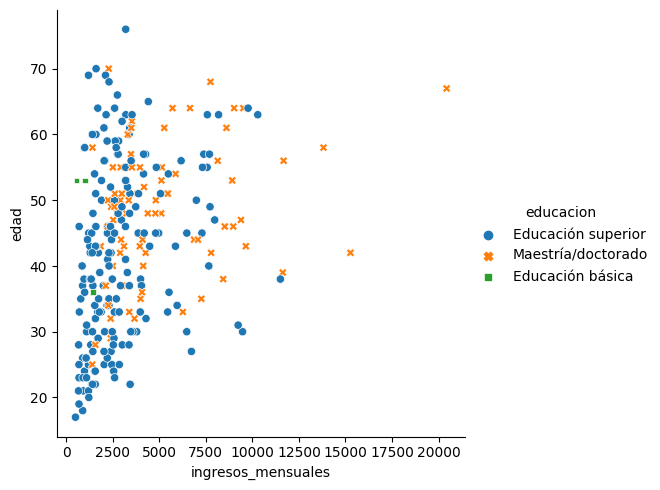

In [125]:

# * Espacio para configurar el gráfico

sns.relplot(x='ingresos_mensuales', y='edad', data=enaho, kind="scatter", hue='educacion', style='educacion')

# * Opción para ver el gráfico
plt.show()

Y modifcando la transparencia

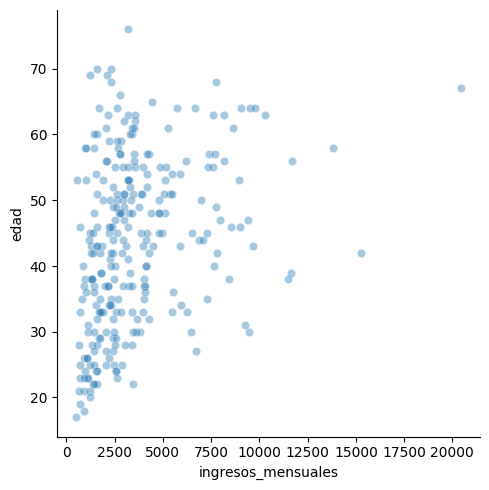

In [126]:

# * Espacio para configurar el gráfico

sns.relplot(x='ingresos_mensuales', y='edad', data=enaho, kind="scatter", alpha=0.4)

# * Opción para ver el gráfico
plt.show()

### CountPlot

Este tipo de gráfico muestra cuántas veces aparece cada categoría en el conjunto de datos, es decir, cuenta el número de observaciones en cada categoría y representa esa cuenta en el eje vertical.

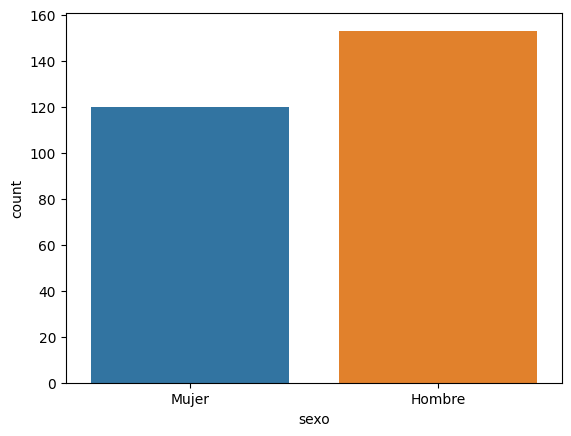

In [127]:
sns.countplot(x='sexo', data=enaho)
plt.show()

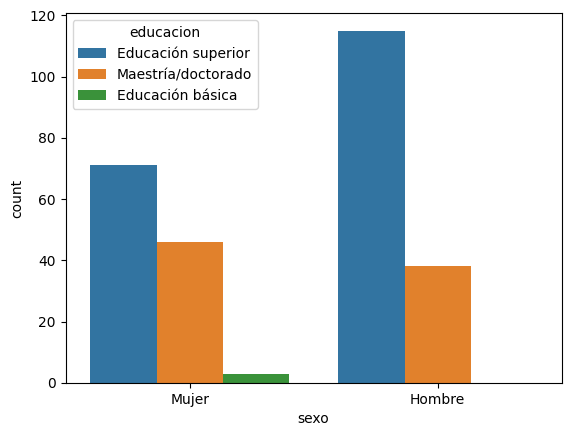

In [128]:
sns.countplot(x='sexo', data=enaho, hue='educacion')
plt.show()

### Line Plot

Un "line plot" (gráfico de líneas) es un tipo de gráfico utilizado para representar datos numéricos a lo largo de un eje de coordenadas cartesianas. En un gráfico de líneas, los datos se representan mediante puntos conectados por líneas rectas. Cada punto en el gráfico representa un par de valores (x, y), donde x generalmente corresponde a una variable independiente (por ejemplo, el tiempo) y y corresponde a una variable dependiente.

In [129]:

# * Procesamiento
# Lectura de datos
yf = pd.read_excel("../data/raw/Yahoo_finance.xlsx")
# Arreglo en el formato de fecha
yf['Date'] = pd.to_datetime(yf['Date'])
yf_acotado = yf[yf['Date']>='2023-08-01'].copy()
# Se crea la variable día
yf_acotado['dia'] = yf_acotado['Date'].dt.day
# Visualización
yf_acotado.head()

,Date,USDPEN,Cobre,dia
934,2023-08-01,3.600000,3.8935,1
935,2023-08-02,3.635000,3.8275,2
936,2023-08-03,3.579198,3.8760,3
937,2023-08-04,3.643000,3.8450,4
938,2023-08-07,3.593736,3.8130,7


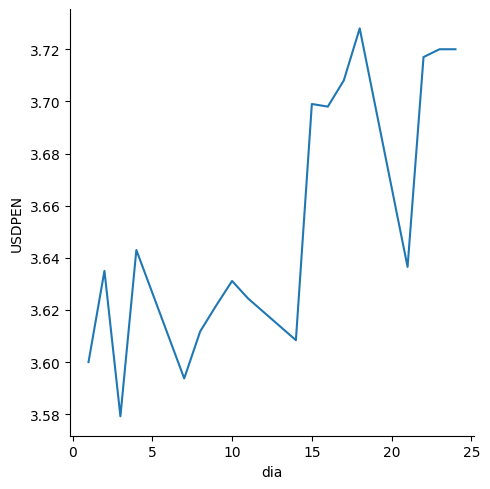

In [130]:

# * Espacio para configurar el gráfico

sns.relplot(x='dia', y='USDPEN', data=yf_acotado, kind="line")

# * Opción para ver el gráfico
plt.show()

In [131]:
# Combinar los datos en un solo DataFrame
combined_df = yf_acotado.melt(id_vars=['dia'], value_vars=['USDPEN', 'Cobre'],
                              var_name='Moneda', value_name='Valor')

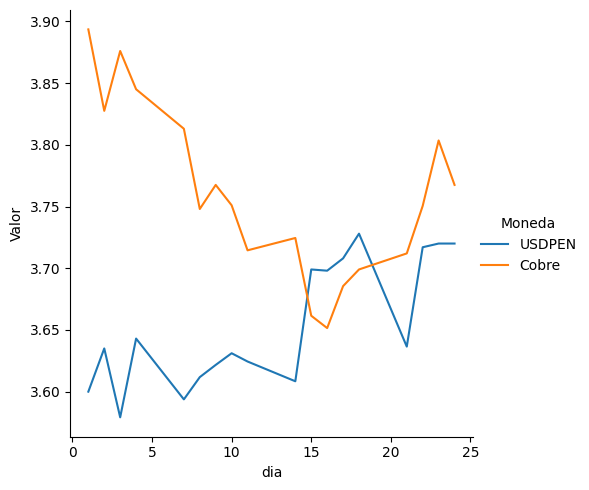

In [132]:

# * Espacio para configurar el gráfico

sns.relplot(x='dia', y='Valor', data=combined_df, kind="line", hue='Moneda')
# * Opción para ver el gráfico
plt.show()

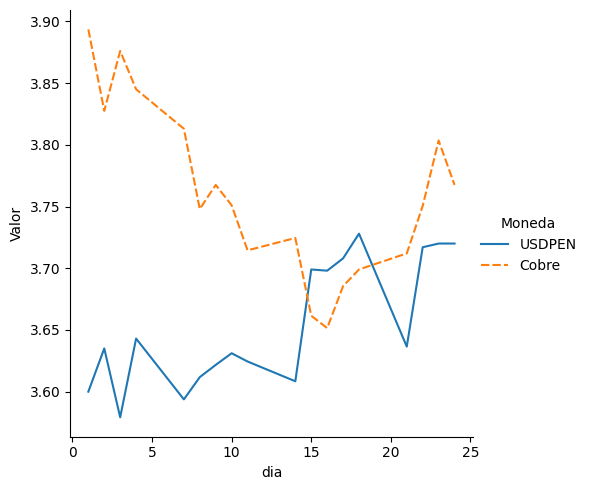

In [133]:

# * Espacio para configurar el gráfico

sns.relplot(x='dia', y='Valor', data=combined_df, kind="line", style='Moneda', hue='Moneda')
# * Opción para ver el gráfico
plt.show()

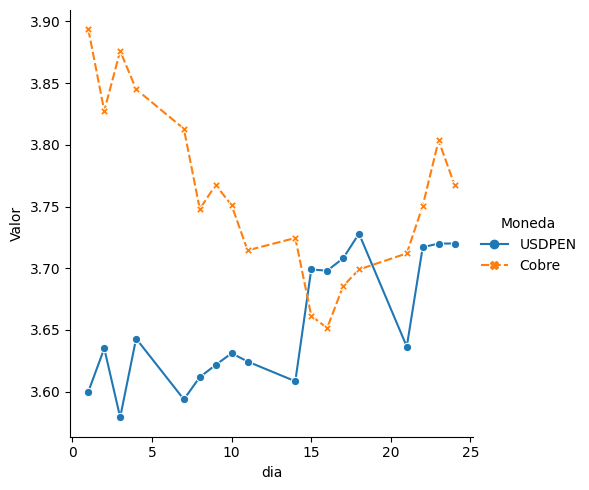

In [134]:

# * Espacio para configurar el gráfico

sns.relplot(x='dia', y='Valor', data=combined_df, kind="line", style='Moneda', hue='Moneda', markers=True)
# * Opción para ver el gráfico
plt.show()

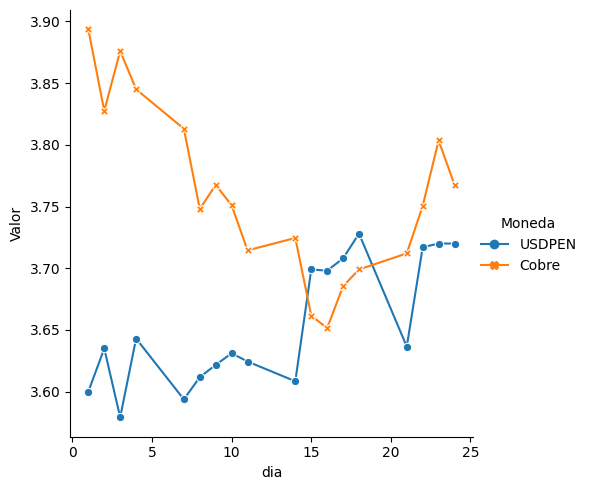

In [135]:

# * Espacio para configurar el gráfico

sns.relplot(x='dia', y='Valor', data=combined_df, kind="line", style='Moneda', hue='Moneda', markers=True, dashes=False)
# * Opción para ver el gráfico
plt.show()

### Cat plot

Los catplots son útiles cuando deseas explorar la relación entre una o más variables categóricas (por ejemplo, categorías, grupos, etiquetas) y una variable numérica (por ejemplo, valores numéricos como conteos, medidas, puntajes, etc.). Seaborn ofrece varias formas de catplots, incluyendo:

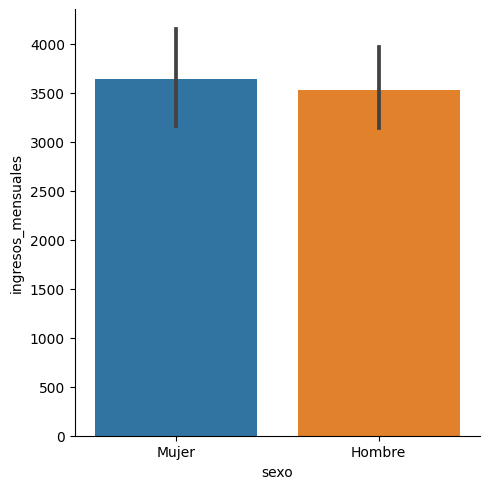

In [139]:

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='bar')

# * Opción para ver el gráfico
plt.show()


C:\Users\MAURICIO\AppData\Local\Temp\ipykernel_40180\2302312519.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='bar', ci=None)


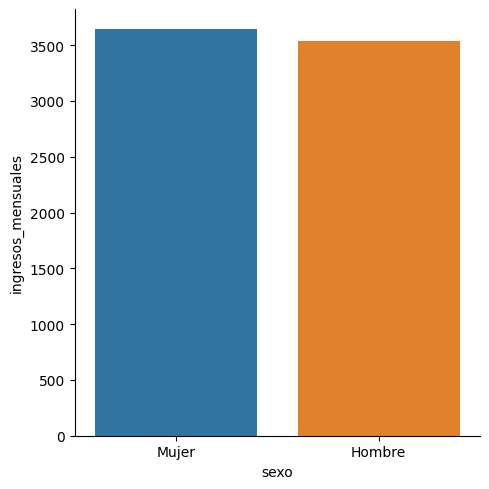

In [140]:

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='bar', ci=None)

# * Opción para ver el gráfico
plt.show()


C:\Users\MAURICIO\AppData\Local\Temp\ipykernel_40180\2944165681.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="ingresos_mensuales", y="sexo", data=enaho, kind='bar', ci=None)


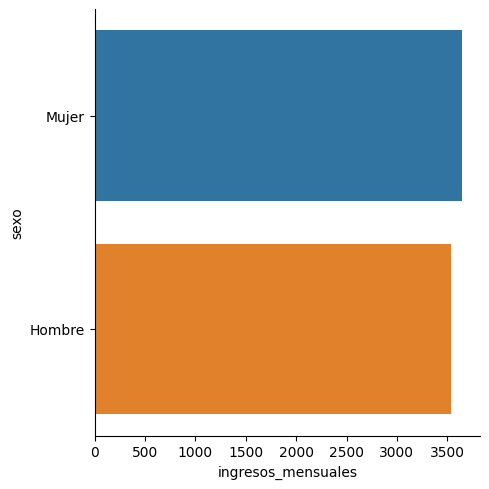

In [141]:

# * Espacio para configurar el gráfico
sns.catplot(x="ingresos_mensuales", y="sexo", data=enaho, kind='bar', ci=None)

# * Opción para ver el gráfico
plt.show()


### Box plot

Un "boxplot" (también conocido como diagrama de caja o gráfico de caja y bigotes) es un tipo de gráfico estadístico que se utiliza para representar la distribución de un conjunto de datos numéricos y resumir información importante sobre sus estadísticas descriptivas, como la mediana, los cuartiles y los valores atípicos. El boxplot se compone de varios elementos:

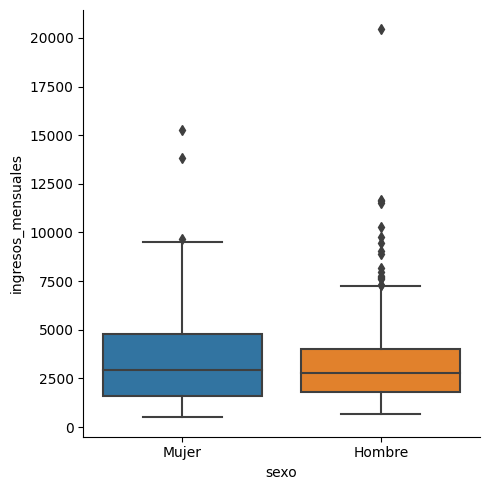

In [143]:

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box')

# * Opción para ver el gráfico
plt.show()


Podemos ordenar las categorías

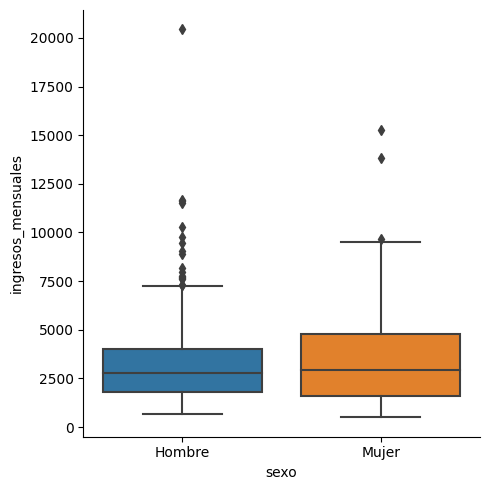

In [144]:

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'])

# * Opción para ver el gráfico
plt.show()


Y quitar los valores atípicos

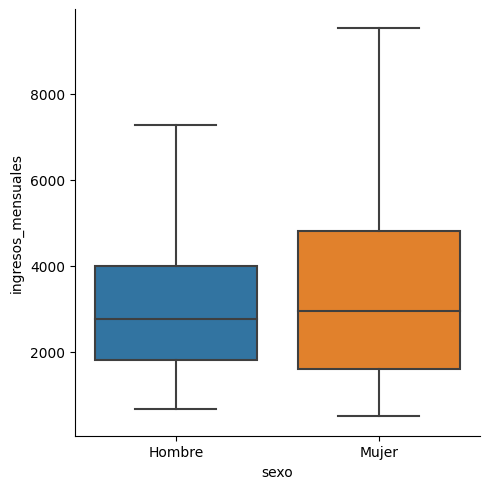

In [145]:

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Opción para ver el gráfico
plt.show()


## **Configuración y estilo de gráficos**

### Estilo de figura

Whitegrid

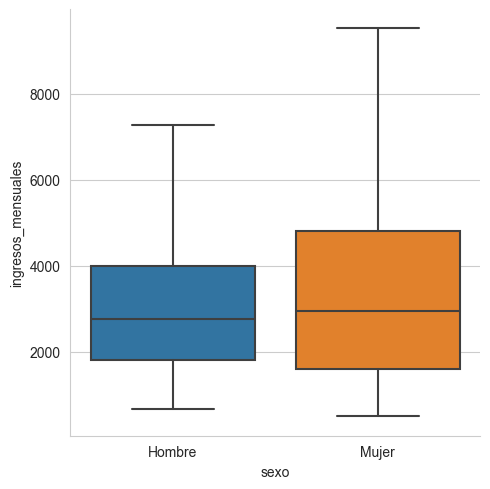

In [146]:

# * Definimos el estilo
sns.set_style("whitegrid")

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Opción para ver el gráfico
plt.show()


Dark

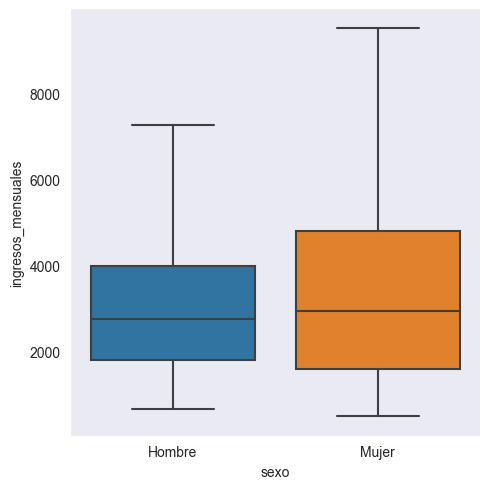

In [148]:

# * Definimos el estilo
sns.set_style("dark")

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Opción para ver el gráfico
plt.show()


Darkgrid

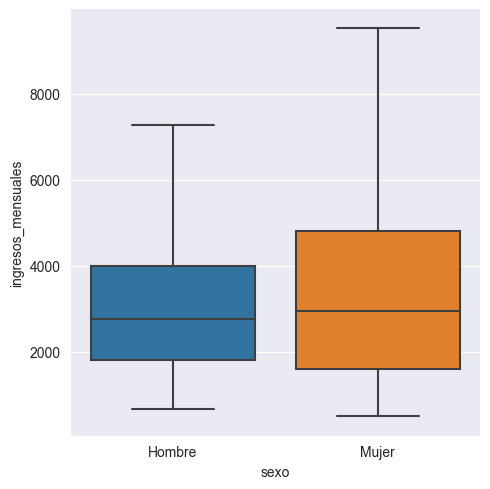

In [149]:

# * Definimos el estilo
sns.set_style("darkgrid")

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Opción para ver el gráfico
plt.show()


### Paleta de colores

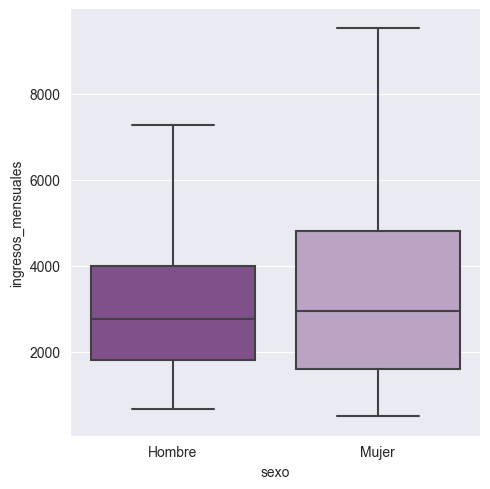

In [153]:

# * Definimos el estilo
sns.set_palette("PRGn")

# * Definimos el estilo
sns.set_style("darkgrid")

# * Espacio para configurar el gráfico
sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Opción para ver el gráfico
plt.show()


### Añadir títulos

La función a usar para el título dependerá del tipo de gráfico que estemos realizando. Para el caso de relplot() , catplot(), que tienen la característica de crear subplots usaremos `g.fig.suptitle("New Title")`; mientras tanto, para el caso de scatterplot() , countplot() , etc., que solo crean plots simples usaremos `g.set_title("New Title")`

In [156]:

# * Definimos el estilo
sns.set_palette("PRGn")

# * Definimos el estilo
sns.set_style("darkgrid")

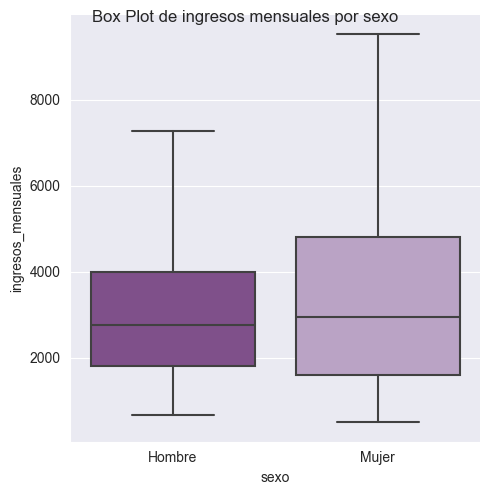

In [164]:

# * Espacio para configurar el gráfico
g = sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Título
plt.suptitle("Box Plot de ingresos mensuales por sexo")

# * Opción para ver el gráfico
plt.show()


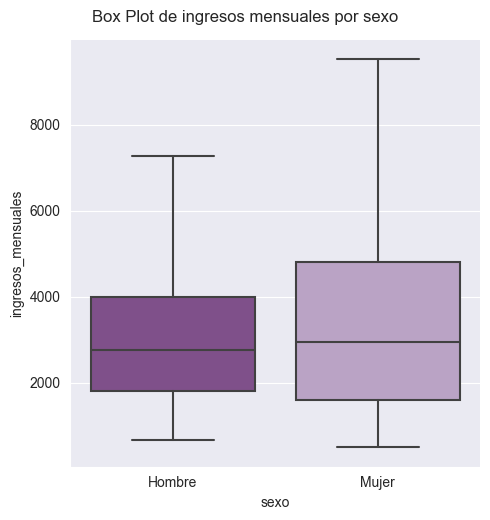

In [165]:


# * Espacio para configurar el gráfico
g = sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Título
plt.suptitle("Box Plot de ingresos mensuales por sexo", y=1.03)

# * Opción para ver el gráfico
plt.show()


### Configurar ejes

Podemos configurar los ejes de nuestro plot usando `g.set(xlabel="New X Label", ylabel="New Y Label")`

Text(-2.1805555555555554, 0.5, 'Ingresos mensuales')

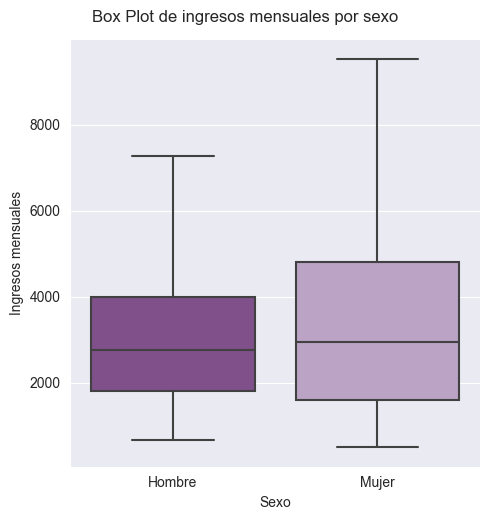

In [172]:


# * Espacio para configurar el gráfico
g = sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Título
plt.suptitle("Box Plot de ingresos mensuales por sexo", y=1.03)

# * Etiquetado de ejes
plt.xlabel('Sexo')
plt.ylabel('Ingresos mensuales')

# * Opción para ver el gráfico
plt.show()


Y también la rotación

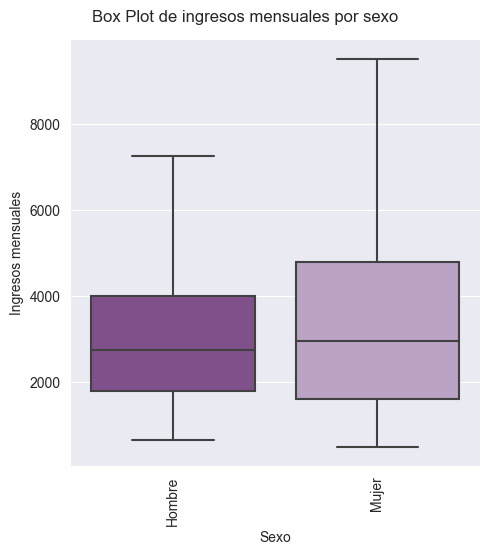

In [174]:


# * Espacio para configurar el gráfico
g = sns.catplot(x="sexo", y="ingresos_mensuales", data=enaho, kind='box', order=['Hombre','Mujer'], sym='')

# * Título
plt.suptitle("Box Plot de ingresos mensuales por sexo", y=1.03)

# * Etiquetado de ejes
plt.xlabel('Sexo')
plt.ylabel('Ingresos mensuales')

# * Rotación
plt.xticks(rotation=90)

# * Opción para ver el gráfico
plt.show()
